In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)
results.sort_values('RMSE', inplace=True)
results

,alpha,l1_ratio,pca__n_components,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length,RMSE,R2,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10,C,epsilon,kernel
elnet,0.0223872,0.60004,27.0,2.0,3.0,1436.0,1038.0,13.0,4.693997,0.501172,0.140440,0.258883,0.368866,0.499154,0.676819,0.818951,0.896785,NA,NA,NA
SVM,NA,NA,36.0,1.0,3.0,1436.0,952.0,13.0,4.711673,0.672883,0.153976,0.287648,0.438240,0.566836,0.746193,0.896785,0.947547,3.16228,0.501187,0
ridge,0.398107,NA,22.0,1.0,3.0,1396.0,1072.0,17.0,4.813673,0.478884,0.113367,0.219966,0.336717,0.446701,0.614213,0.766497,0.884941,NA,NA,NA
lasso,0.1,NA,47.0,2.0,3.0,1434.0,1034.0,13.0,4.814075,0.488175,0.150592,0.267343,0.389171,0.485618,0.670051,0.800338,0.888325,NA,NA,NA


# scores

In [3]:
# Sorted by RMSE
results[['RMSE', 'R2']]

,RMSE,R2
elnet,4.693997,0.501172
SVM,4.711673,0.672883
ridge,4.813673,0.478884
lasso,4.814075,0.488175


In [4]:
# Sorted by RMSE
results[['R2', 'RMSE', ]].sort_values('R2', ascending = False)

,R2,RMSE
SVM,0.672883,4.711673
elnet,0.501172,4.693997
lasso,0.488175,4.814075
ridge,0.478884,4.813673


In [5]:
# PCA
results[['pca__n_components']]

,pca__n_components
elnet,27.0
SVM,36.0
ridge,22.0
lasso,47.0


In [6]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
elnet,2.0,3.0,1436.0,1038.0,13.0
SVM,1.0,3.0,1436.0,952.0,13.0
ridge,1.0,3.0,1396.0,1072.0,17.0
lasso,2.0,3.0,1434.0,1034.0,13.0


In [7]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
elnet,14.043993,25.888325,36.886633,49.915398,67.681895,81.895093,89.678511
SVM,15.397631,28.764805,43.824027,56.683587,74.619289,89.678511,94.754653
ridge,11.336717,21.996616,33.671743,44.670051,61.421320,76.649746,88.494078
lasso,15.059222,26.734349,38.917090,48.561760,67.005076,80.033841,88.832487


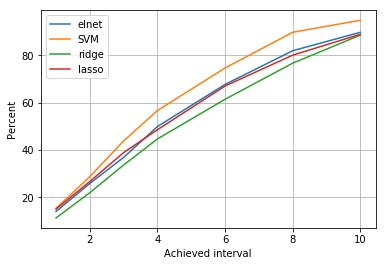

In [8]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Percent')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png')
plt.show()

# Regularization

In [9]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
elnet,0.0223872,0.60004,NA,NA
SVM,NA,NA,3.16228,0.501187
ridge,0.398107,NA,NA,NA
lasso,0.1,NA,NA,NA
